# Методы машинного обучения.

## ЛР5. - Наивный байесовский классификатор для фильтрации спама.

Решить задачу фильтрации спама с использованием наивного байесовского классификатора, основанного на принципе максимума апостериорной вероятности. В качестве исходных данных можно использовать данные с сайта Kaggle (SMS Spam Collection Dataset) (можно какой-то другой датасет).

В выполнения работы:
- Осуществить предобработку данных. Сформировать обучающий и тестовый наборы данных.
- Построить наивный байесовский классификатор.
- Оценить качество работы классификатора.


## Выполнение

In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("uciml/sms-spam-collection-dataset")

100%|██████████| 211k/211k [00:00<00:00, 13.1MB/s]

Extracting files...


In [ ]:
path

'/root/.cache/kagglehub/datasets/uciml/sms-spam-collection-dataset/versions/1'

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, confusion_matrix, matthews_corrcoef, ConfusionMatrixDisplay
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import re
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud

nltk.download('punkt')
nltk.download('punkt_tab')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
df = pd.read_csv(path+'/spam.csv', encoding='latin-1')
df = df.rename(columns={'v1': 'label', 'v2': 'message'})

In [ ]:
# Преобразование меток в числовой формат
df['label'] = df['label'].map({'ham': 0, 'spam': 1})

In [ ]:
def preprocess_text(text):
    text = text.lower()
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    tokens = word_tokenize(text)

    stop_words = set(stopwords.words('english'))
    tokens = [token for token in tokens if token not in stop_words]

    return ' '.join(tokens)

In [ ]:
df['processed_message'] = df['message'].apply(preprocess_text)

X = df['processed_message']
y = df['label']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [ ]:
pipeline = Pipeline([
    ('tfidf', TfidfVectorizer(max_features=5000)),
    ('classifier', MultinomialNB())
])
pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_test)


Отчет о классификации:
              precision    recall  f1-score   support

         Ham       0.96      1.00      0.98       966
        Spam       0.99      0.74      0.85       149

    accuracy                           0.97      1115
   macro avg       0.98      0.87      0.92      1115
weighted avg       0.97      0.97      0.96      1115


Матрица ошибок:
[[965   1]
 [ 38 111]]

Дополнительные метрики:
Точность (Accuracy): 0.9650
Точность (Precision): 0.9911
Полнота (Recall): 0.7450
F1-мера: 0.8506
MCC: 0.8421


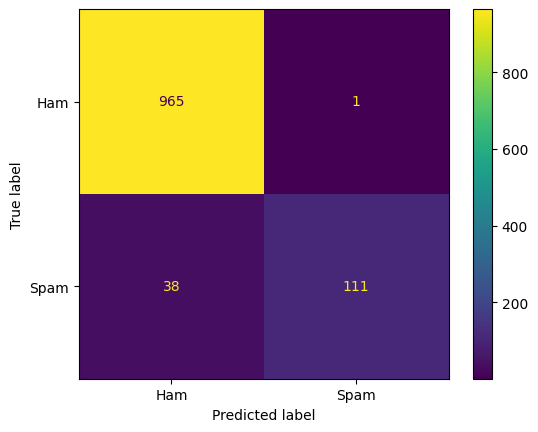

In [ ]:
print("\nОтчет о классификации:")
print(classification_report(y_test, y_pred, target_names=['Ham', 'Spam']))

print("\nМатрица ошибок:")
conf_matrix = confusion_matrix(y_test, y_pred)
print(conf_matrix)

cmd = ConfusionMatrixDisplay(conf_matrix, display_labels=['Ham','Spam'])
cmd.plot()

tn, fp, fn, tp = conf_matrix.ravel()

accuracy = (tp + tn) / (tp + tn + fp + fn)
precision = tp / (tp + fp)
recall = tp / (tp + fn)
f1 = 2 * (precision * recall) / (precision + recall)
mcc = matthews_corrcoef(y_test, y_pred)

print("\nДополнительные метрики:")
print(f"Точность (Accuracy): {accuracy:.4f}")
print(f"Точность (Precision): {precision:.4f}")
print(f"Полнота (Recall): {recall:.4f}")
print(f"F1-мера: {f1:.4f}")
print(f"MCC: {mcc:.4f}")

Text(0.5, 1.0, 'Message Types and Counts')

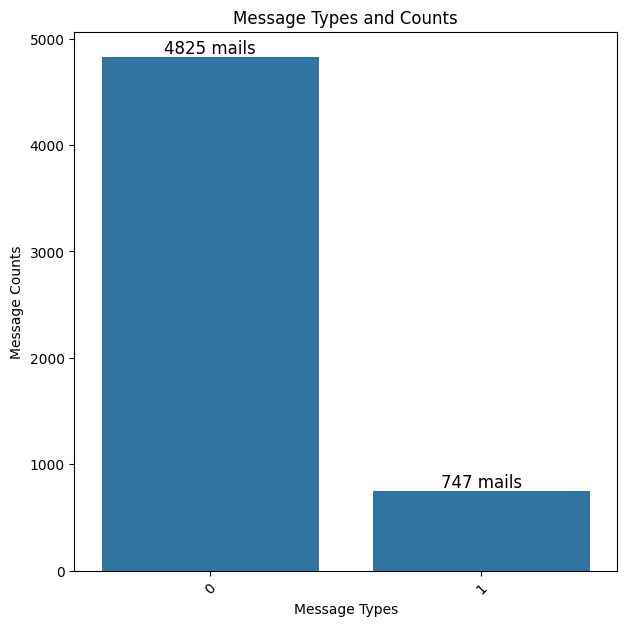

In [ ]:
fig, ax = plt.subplots(figsize=(7,7))

sns.barplot(x=y.unique(), y=y.value_counts(), ax=ax)

# Add value labels directly using bar_label()
ax.bar_label(ax.containers[0], fmt='%.i mails', fontsize=12, padding=0)

plt.xticks(rotation=45)
plt.xlabel('Message Types')
plt.ylabel('Message Counts')
plt.title('Message Types and Counts')

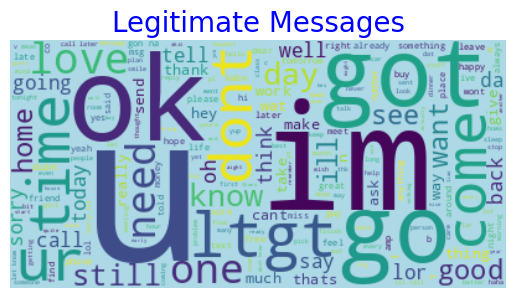

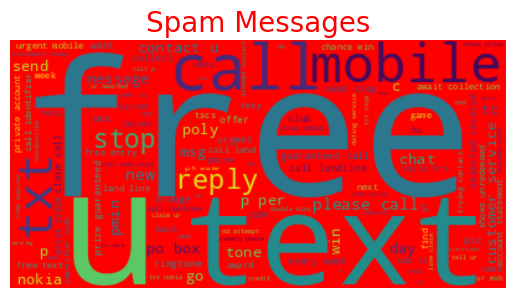

In [ ]:
text_ham=X.where(y==0).str.cat(sep=' ')
text_spam=X.where(y==1).str.cat(sep=' ')

wordcloud_ham = WordCloud(background_color='lightblue').generate(text_ham)
wordcloud_spam = WordCloud(background_color='red').generate(text_spam)

plt.imshow(wordcloud_ham, interpolation='bilinear')
plt.title('Legitimate Messages', fontdict={'fontsize' : 20, 'color' : 'blue'})
plt.axis("off")
plt.show()

plt.imshow(wordcloud_spam, interpolation='bilinear')
plt.title('Spam Messages', fontdict={'fontsize' : 20, 'color' : 'red'})
plt.axis("off")
plt.show()

In [ ]:
print("\nПример классификации новых сообщений:")
test_messages = [
    "URGENT! You have won a 1 week FREE membership in our £100,000 Prize Jackpot!",
    "Hey, what time are we meeting for lunch tomorrow?",
    "Congratulations! You've been selected to receive a free iPhone! Click here!",
    "Don't forget to bring your laptop to the meeting"
]

predictions = pipeline.predict([preprocess_text(msg) for msg in test_messages])
for msg, pred in zip(test_messages, predictions):
    print(f"{'SPAM' if pred == 1 else 'HAM'}: {msg}")


Пример классификации новых сообщений:
SPAM: URGENT! You have won a 1 week FREE membership in our £100,000 Prize Jackpot!
HAM: Hey, what time are we meeting for lunch tomorrow?
SPAM: Congratulations! You've been selected to receive a free iPhone! Click here!
HAM: Don't forget to bring your laptop to the meeting
